<a href="https://colab.research.google.com/github/Aryan9012004/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

US Accidents Analysis

##Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##Data Handeling

**Loading Dataset into Pandas Dataframe**

In [3]:
data_filepath = "/content/drive/MyDrive/Dataset_prodigy/US_Accidents_March23.csv"
data = pd.read_csv(data_filepath)
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


**Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

**Columns in dataframe**

In [5]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**Statistical Description of each column**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


**Numerical Columns to deal with**

In [7]:
print(data.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(data.count(numeric_only=True)))

Severity             7728394
Start_Lat            7728394
Start_Lng            7728394
End_Lat              4325632
End_Lng              4325632
Distance(mi)         7728394
Temperature(F)       7564541
Wind_Chill(F)        5729375
Humidity(%)          7554250
Pressure(in)         7587715
Visibility(mi)       7551296
Wind_Speed(mph)      7157161
Precipitation(in)    5524808
Amenity              7728394
Bump                 7728394
Crossing             7728394
Give_Way             7728394
Junction             7728394
No_Exit              7728394
Railway              7728394
Roundabout           7728394
Station              7728394
Stop                 7728394
Traffic_Calming      7728394
Traffic_Signal       7728394
Turning_Loop         7728394
dtype: int64
Total No. of Numerical Columns: 26


**Percentage of Missing Values**

In [8]:
missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 End_Lng                  44.029355
End_Lat                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64


**Getting List of Columns Having Null Values**

In [9]:
null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['End_Lat', 'End_Lng', 'Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


**Checking Missing Values Pattern in Dataframe**

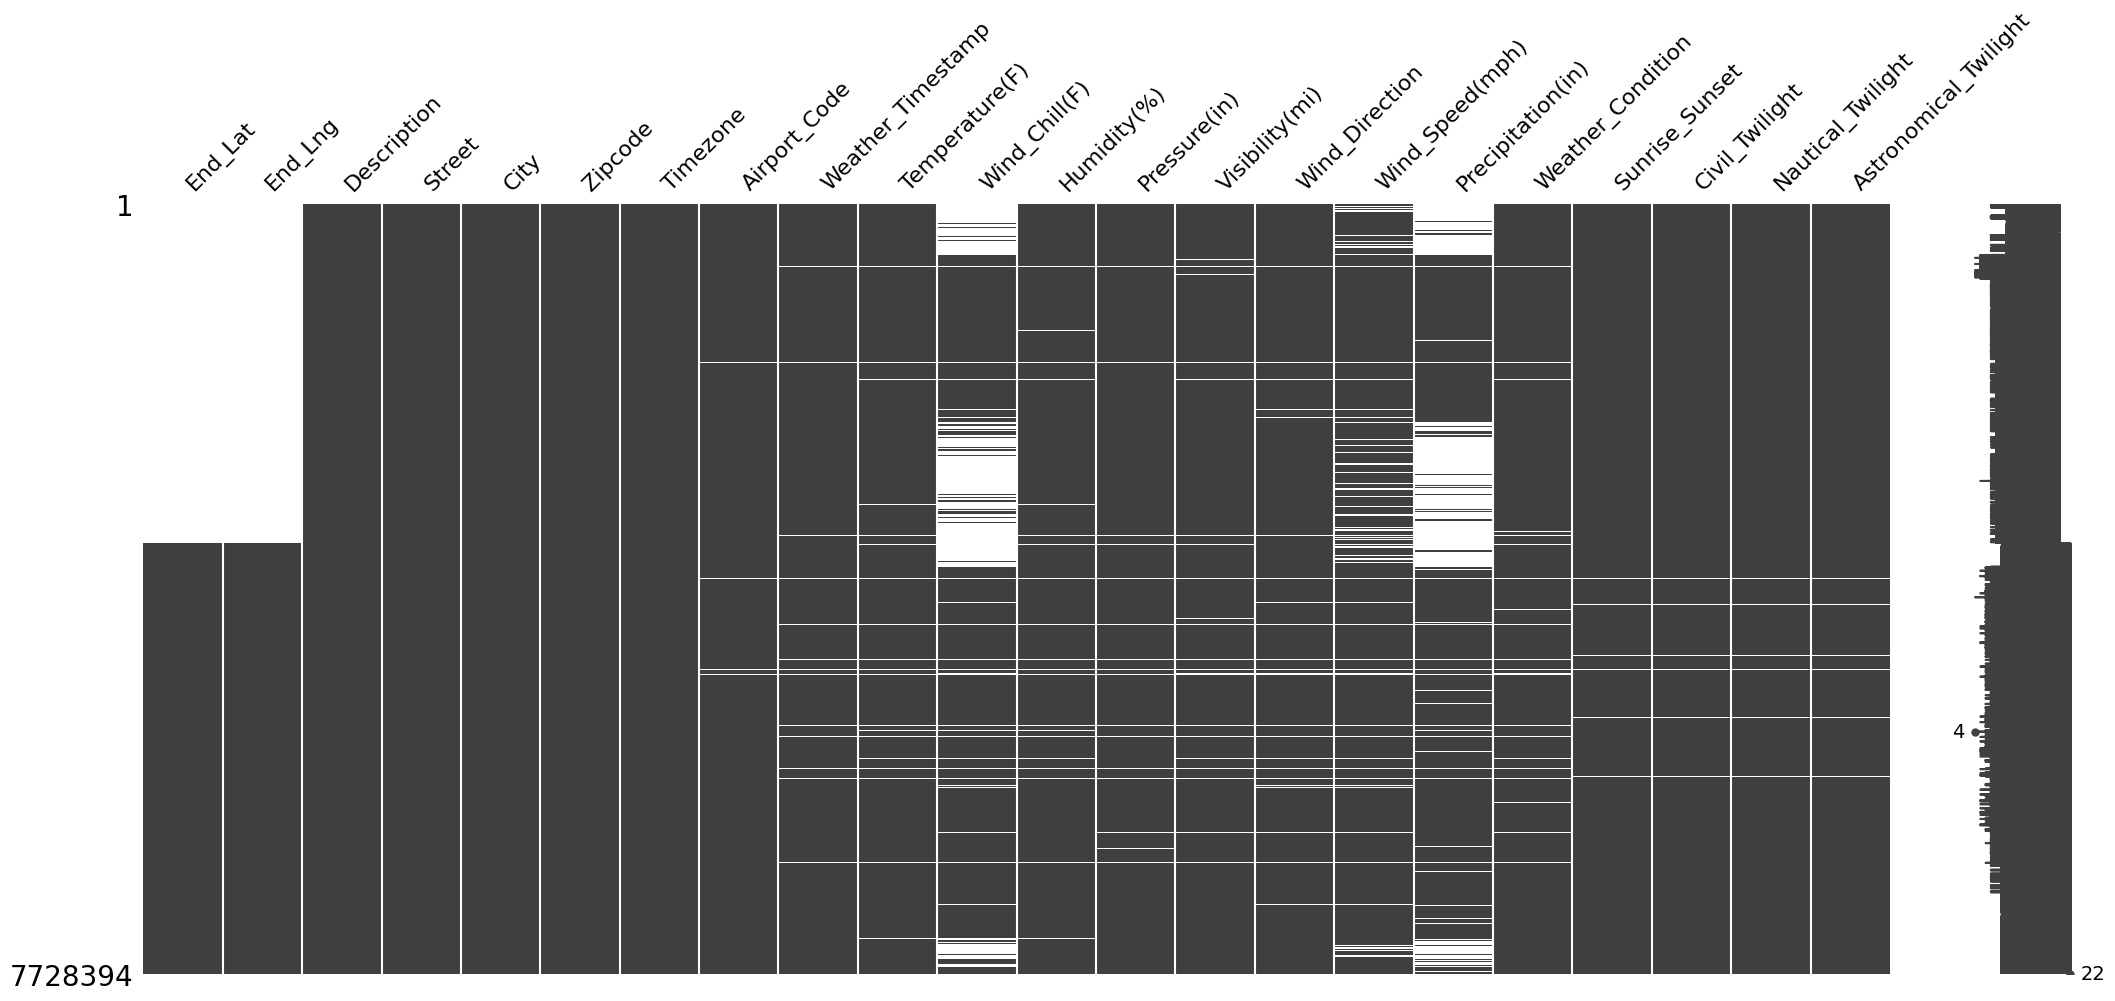

In [10]:
mn.matrix(data[null_cols]);

In [11]:
new_data_a = data.drop(columns=["Precipitation(in)", "End_Lat"], axis=0)

In [12]:
final_data = new_data_a.drop(columns = 'ID', axis=0)

In [13]:
final_data.isnull().sum()

,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lng,3402762
Distance(mi),0
Description,5
Street,10869


##Exploratory Data Analysis

**Location**

In [14]:
state_counts = final_data["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

In [15]:
print("State Code: ", final_data.State.unique())
print("Total No. of State in Dataset: ", len(final_data.State.unique()))

State Code:  ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']
Total No. of State in Dataset:  49


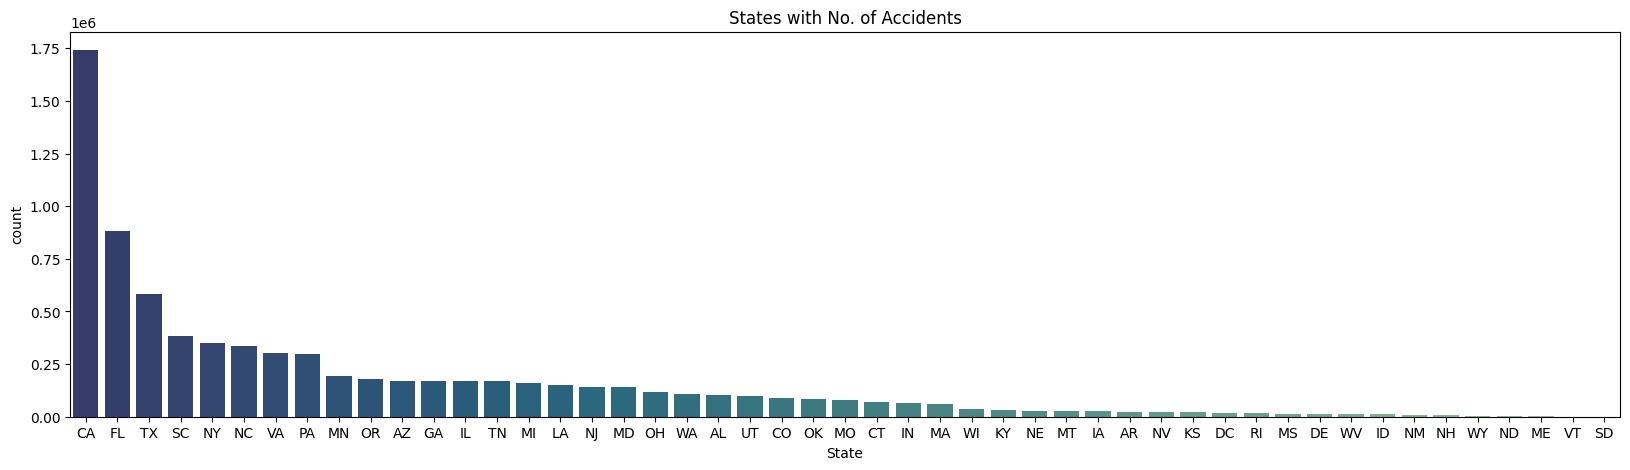

In [16]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=final_data, orient = 'v', palette = "crest_r", order = final_data['State'].value_counts().index)
c.set_title("States with No. of Accidents");



* California (CA) is the 3rd most largest
state of US after Texas (TX) and Alaska (AL)
*   Also California (CA) is the most populated among all, followed by Texas (TX)

* Alaska (AL) is the largest state but least populated state at 48th rank










In [17]:
print("City Code: ", final_data.City.unique())
print("Total No. of Cities in Dataset: ", len(final_data.City.unique()))

City Code:  ['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Ness City' 'Clarksdale'
 'American Fork-Pleasant Grove']
Total No. of Cities in Dataset:  13679


<ipython-input-18-febf7253c165>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



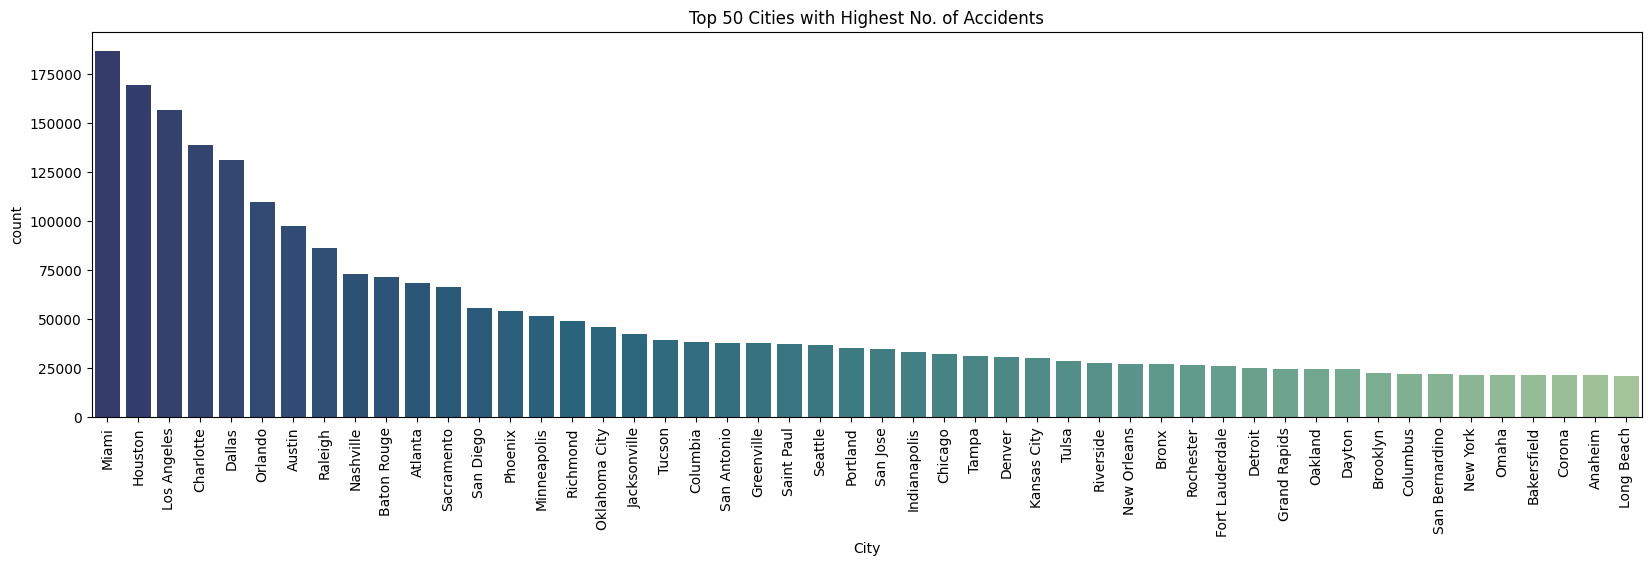

In [18]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

**Timestamp**

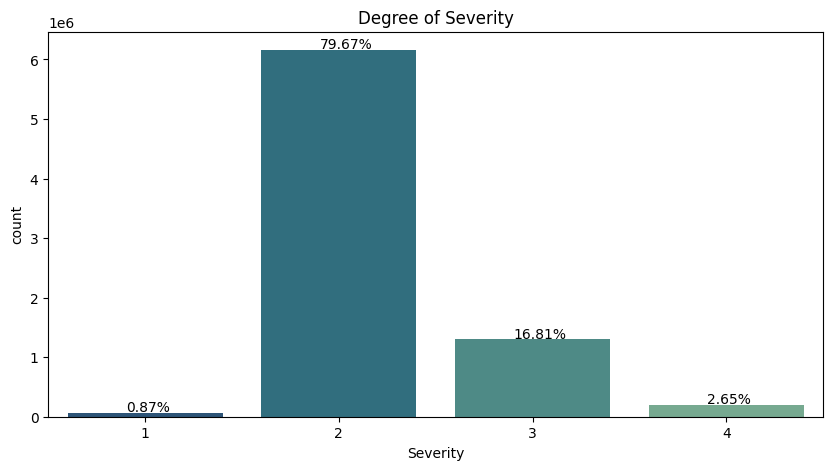

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Severity", data=final_data, orient = 'v', palette = "crest_r")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(final_data.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

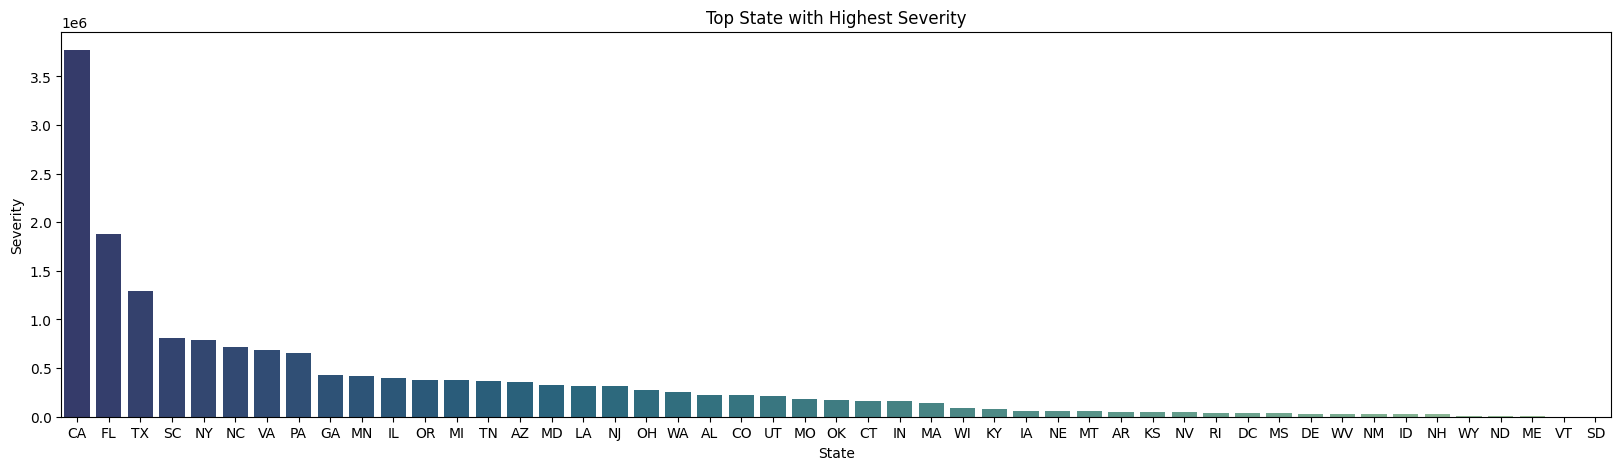

In [20]:
df_state = final_data.groupby('State').sum('Severity')[['Severity']]
df_state = df_state.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'State', y = 'Severity', data = df_state, orient = 'v', palette = "crest_r")
c.set_title("Top State with Highest Severity")
plt.show()

<ipython-input-21-d385e180f5d0>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



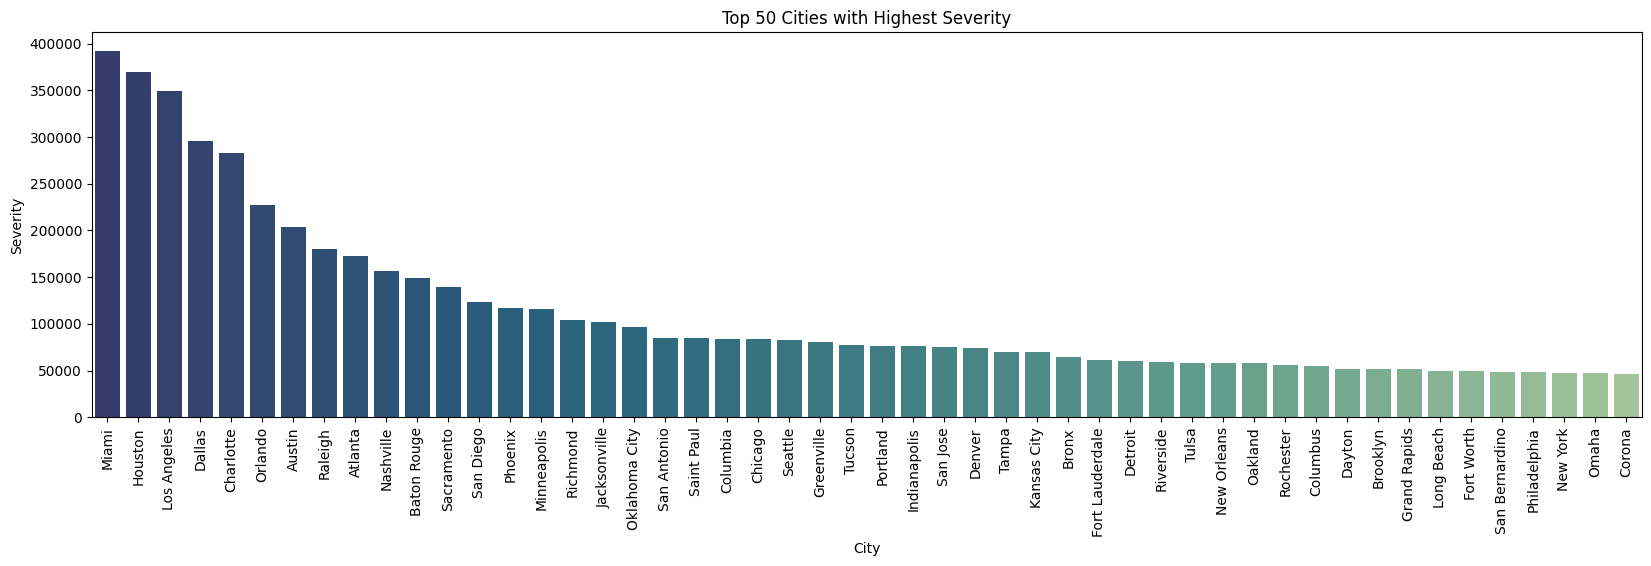

In [21]:
df_city = final_data.groupby('City').sum('Severity')[['Severity']]
df_city = df_city.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'City', y = 'Severity', data = df_city, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest Severity")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [22]:
final_data.iloc[:10, 17:26]

,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition
0,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,Light Rain
1,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,Light Rain
2,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,Overcast
3,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,Mostly Cloudy
4,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,Mostly Cloudy
5,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,Light Rain
6,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,Overcast
7,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,Overcast
8,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,Mostly Cloudy
9,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,SSW,4.6,Light Rain


**Location Impact**

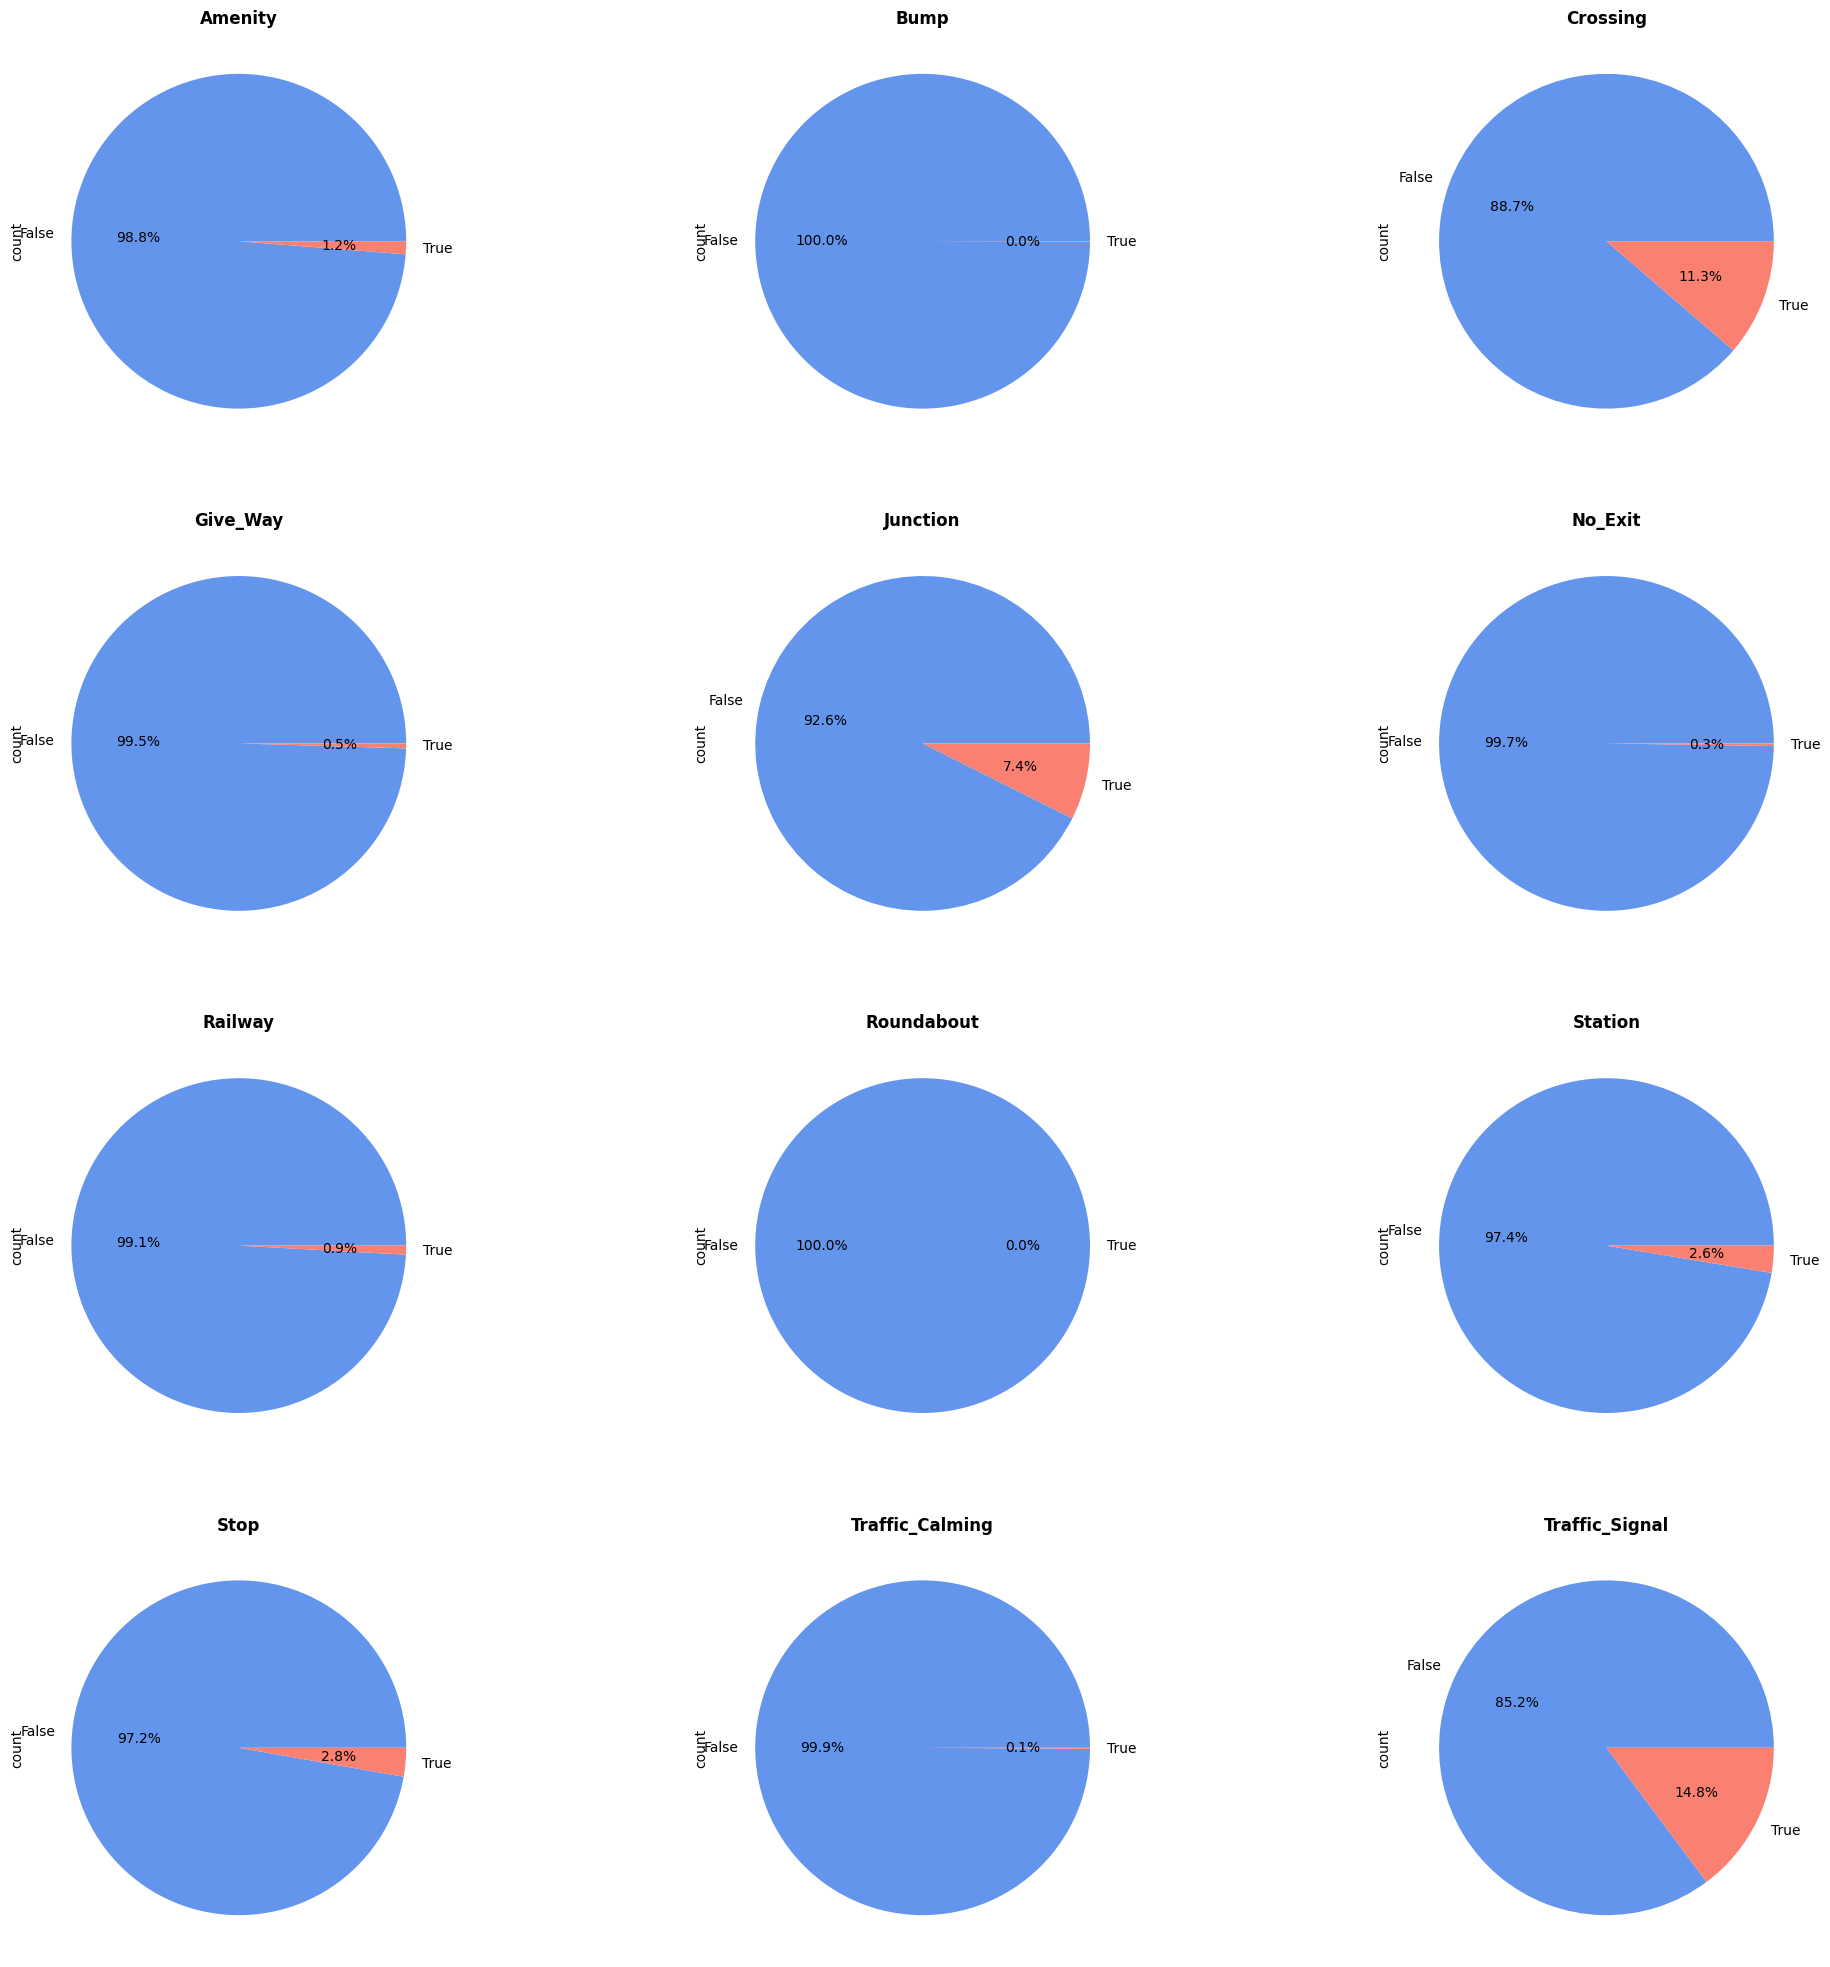

In [23]:
f,ax=plt.subplots(4,3,figsize=(25,25))
ax[0,0] = final_data['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["cornflowerblue","salmon"])
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = final_data['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["cornflowerblue","salmon"])
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = final_data['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["cornflowerblue","salmon"])
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = final_data['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["cornflowerblue","salmon"])
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = final_data['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["cornflowerblue","salmon"])
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = final_data['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["cornflowerblue","salmon"])
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = final_data['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["cornflowerblue","salmon"])
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = final_data['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["cornflowerblue","salmon"])
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = final_data['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["cornflowerblue","salmon"])
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = final_data['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["cornflowerblue","salmon"])
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = final_data['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["cornflowerblue","salmon"])
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = final_data['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["cornflowerblue","salmon"])
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")
plt.show()